# Merger models of blue supergiants 

Plots the period spacing and large frequency separation of merger models. 

by [Earl Patrick Bellinger](https://earlbellinger.com)$^{1,2,3}$

$^1$_Max Planck Institute for Astrophysics, Garching, Germany_ \
$^2$_Yale University, USA_ \
$^3$_Stellar Astrophysics Centre, Aarhus, Denmark_

In [1]:
import os

import numpy as np
import scipy as sp
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

from scipy.signal import savgol_filter

from ipywidgets import interact, IntSlider

import seaborn as sns

import functools

import pickle

In [2]:
from matplotlib.colors import Normalize
from matplotlib.patches import Ellipse

In [3]:
red = "#CA0020"
orange = "#F97100" 
blue = "#0571b0"

In [4]:
# Set plotting style 
sns.set(style="ticks", palette="muted", 
        rc={"xtick.bottom" : True, "ytick.left" : True})
plt.style.use('thinfig')

In [5]:
red = "#CA0020"
orange = "#F97100" 
blue = "#0571b0"

In [6]:
from mesagrid import Track, Grid

In [7]:
def load_history_extras(self, DF_):
    return DF_

In [8]:
usecols_history = ['model_number', 'star_age', 'log_Teff', 'log_L', 'log_R', 'center_h1', 'center_he4', 'delta_nu']
cpus = 8

In [9]:
grid_dirs = ["work/grid_normal", "work/grid_merge", "work/grid_semi"]
grid_normal, grid_merger, grid_semi = [Grid(dir, load_history_extras=load_history_extras,
                                #usecols_profiles=usecols_profiles,
                                usecols_history=usecols_history,
                                cpus=cpus)
                            for dir in grid_dirs]

In [10]:
#import pickle
#with open('grid_normal-freq_change.pkl', 'rb') as f:
#    grid_normal = pickle.load(f)
#
#with open('grid_merger-freq_change.pkl', 'rb') as f:
#    grid_merger = pickle.load(f)

In [11]:
grid_normal

100%|████████████████████████████████████████| 22/22 [00:00<00:00, 70170.87it/s]


Grid with 22 tracks
Columns: M, os, Z, Track
M     [10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17....
os                                         [0.335, 0.7]
Z                                                [0.02]
dtype: object

In [12]:
grid_merger

100%|████████████████████████████████████████| 19/19 [00:00<00:00, 29548.30it/s]


Grid with 19 tracks
Columns: M, mc, mg, Ye, Z, Track
M     [10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17....
mc                                    [0.3, 0.25, 0.35]
mg                                     [0.0, 0.3, 0.15]
Ye                                   [0.28, 0.31, 0.34]
Z                                                [0.02]
dtype: object

In [13]:
grid_semi

100%|████████████████████████████████████████| 11/11 [00:00<00:00, 21814.35it/s]


Grid with 11 tracks
Columns: M, os, Z, semi, Track
M       [10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17....
os                                                 [0.11]
Z                                                  [0.02]
semi                                              [100.0]
dtype: object

In [14]:
grid_Hcore  = grid_normal.filter({'os': 0.7, 'Z': 0.02, 'M': 17})
grid_Hshell = grid_normal.filter({'os': 0.335, 'Z': 0.02, 'M': 17})
grid_merg   = grid_merger.filter({'mc': 0.3, 'mg': 0, 'Ye': 0.28, 'Z': 0.02, 'M': 17})
grid_semi   = grid_semi.filter({'os': 0.11, 'M': 17})

In [15]:
#Teff = 10**grid_merg.iloc[0].Track.history.log_Teff
R = 10**grid_merg.iloc[0].Track.history.log_R
mdl_merge = np.argmin((R - 35)**2)
mdl_merge

Parsing {'M': 17.0, 'mc': 0.3, 'mg': 0.0, 'Ye': 0.28, 'Z': 0.02, 'Track': <mesagrid.star.Track object at 0x7f6e3f56f1c0>}


121

In [16]:
#Teff = 10**grid_Hcore.iloc[0].Track.history.log_Teff
R = 10**grid_Hcore.iloc[0].Track.history.log_R
mdl_Hcore = np.argmin((R - 35)**2)
mdl_Hcore

Parsing {'M': 17.0, 'os': 0.7, 'Z': 0.02, 'Track': <mesagrid.star.Track object at 0x7f6e3f546b80>}


103

In [17]:
Teff = 10**grid_Hshell.iloc[0].Track.history.log_Teff
R = 10**grid_Hshell.iloc[0].Track.history.log_R
mdl_Hshel = np.argmin((R - 35)**2)
mdl_Hshel

Parsing {'M': 17.0, 'os': 0.335, 'Z': 0.02, 'Track': <mesagrid.star.Track object at 0x7f6e3f546e80>}


203

In [18]:
mask = np.logical_and(grid_semi.iloc[0].Track.history.center_h1 < 0.0001, 
                      grid_semi.iloc[0].Track.history.center_he4 < 0.9)
R = 10**grid_semi.iloc[0].Track.history.log_R
mdl = np.argmin((R[mask] - 35)**2)
mdl_blue = np.where(mask)[0][mdl]
mdl_blue

Parsing {'M': 17.0, 'os': 0.11, 'Z': 0.02, 'semi': 100.0, 'Track': <mesagrid.star.Track object at 0x7f6e3f56fca0>}


464

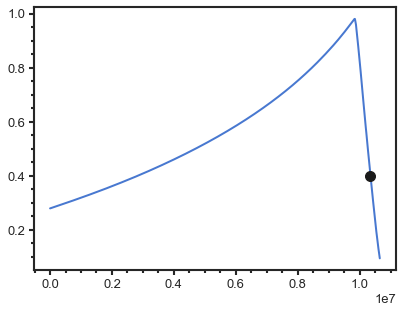

In [19]:
plt.plot(grid_semi.iloc[0].Track.history.star_age, 
         grid_semi.iloc[0].Track.history.center_he4)
plt.plot(grid_semi.iloc[0].Track.history.star_age[mdl_blue], 
         grid_semi.iloc[0].Track.history.center_he4[mdl_blue], 'k.', ms=20)

[]

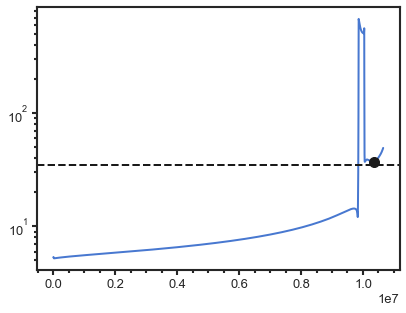

In [20]:
plt.plot(grid_semi.iloc[0].Track.history.star_age, 
         10**grid_semi.iloc[0].Track.history.log_R)
plt.plot(grid_semi.iloc[0].Track.history.star_age[mdl_blue], 10**grid_semi.iloc[0].Track.history.log_R[mdl_blue], 'k.', ms=20)
plt.axhline(35, ls='--', c='k')
plt.semilogy()

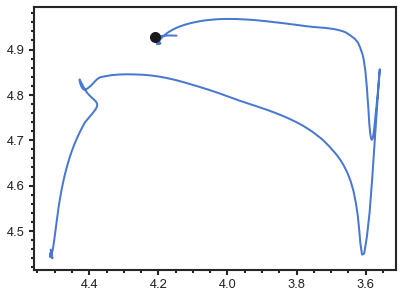

In [21]:
plt.plot(grid_semi.iloc[0].Track.history.log_Teff, grid_semi.iloc[0].Track.history.log_L)
plt.plot(grid_semi.iloc[0].Track.history.log_Teff[mdl_blue], grid_semi.iloc[0].Track.history.log_L[mdl_blue], 'k.', ms=20)
plt.gca().invert_xaxis()

In [22]:
brunt_s = '#457b9d'
brunt_f = '#a8dadc'
lamb_s = '#e76f51'
lamb_f = '#f4a261'


brunt_s = '#1d3557'
brunt_f = '#a8dadc'
lamb_s = '#e76f51'
lamb_f = '#f6c6a1'

brunt_s = '#00441b'
brunt_f = '#92d28f'
#lamb_s = '#1d3557'
#lamb_f = '#a8dadc'

100%|█████████████████████████████████████████| 204/204 [00:13<00:00, 15.54it/s]
/tmp/ipykernel_1101/3738439672.py:3: RuntimeWarning: invalid value encountered in sqrt
  brunt = np.sqrt(gyre.N2)/(2*np.pi)*1e6
/tmp/ipykernel_1101/3738439672.py:7: RuntimeWarning: divide by zero encountered in divide
  lamb = np.sqrt(1*(1+1))*gyre.cs / gyre.r * 1e6
100%|█████████████████████████████████████████| 452/452 [00:12<00:00, 37.34it/s]
/tmp/ipykernel_1101/3738439672.py:3: RuntimeWarning: invalid value encountered in sqrt
  brunt = np.sqrt(gyre.N2)/(2*np.pi)*1e6
/tmp/ipykernel_1101/3738439672.py:7: RuntimeWarning: divide by zero encountered in divide
  lamb = np.sqrt(1*(1+1))*gyre.cs / gyre.r * 1e6
100%|█████████████████████████████████████████| 436/436 [00:09<00:00, 47.63it/s]
/tmp/ipykernel_1101/3738439672.py:3: RuntimeWarning: invalid value encountered in sqrt
  brunt = np.sqrt(gyre.N2)/(2*np.pi)*1e6
/tmp/ipykernel_1101/3738439672.py:7: RuntimeWarning: divide by zero encountered in divide
  lam

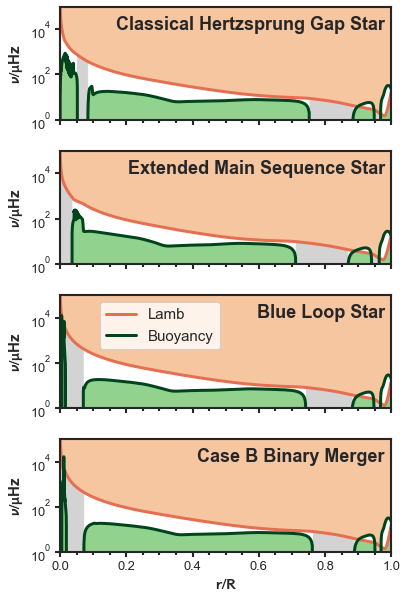

In [23]:
def plot_propagation(gyre, xlab=1, lab=0):
    x = gyre.r / np.max(gyre.r) #10**prof.logR / np.max(10**prof.logR)
    brunt = np.sqrt(gyre.N2)/(2*np.pi)*1e6
    brunt[brunt<0]=1e-10
    brunt[np.isnan(brunt)]=1e-10
    #lamb  = gyre.lamb_S.values*1e6/np.sqrt(2)*np.sqrt(ell*(ell+1))
    lamb = np.sqrt(1*(1+1))*gyre.cs / gyre.r * 1e6
    N  = gyre.N
    
    plt.gca().set_rasterization_zorder(-1)
    
    plt.plot(x, lamb, lw=3, label='Lamb', color=lamb_s)
    plt.plot(x, brunt, lw=3, label='Buoyancy', color=brunt_s)
    
    gmodes = np.minimum(brunt, lamb)
    pmodes = np.maximum(brunt, lamb)
    conv = [pmodes[ii] if N[ii]<=0 else 0 for ii in range(len(pmodes))]
    plt.fill_between(x, 
                     np.zeros(len(gmodes)), 
                     gmodes, 
                     color=brunt_f, alpha=1, zorder=-99)
    plt.fill_between(x, 
                     1e99*np.ones(len(pmodes)), 
                     pmodes, 
                     color=lamb_f, alpha=1, zorder=-99)
    plt.fill_between(x, 
                     np.zeros(len(gmodes)), 
                     conv, 
                     color='lightgray', zorder=-999)
    
    plt.ylim([1e0, 100000])
    plt.semilogy()
    plt.xlim([0, 1])
    plt.ylabel(r'$\mathbf{\nu/\mu}$Hz')
    if xlab:
        plt.xlabel(r'$\mathbf{r/R}$')
    else:
        plt.gca().set_xticklabels([])
    if lab:
        plt.legend(loc=(0.12, 0.52))

plt.figure(figsize=(6, 6.5*(4/3)))#figsize=(8*(2/3),6.5))
plt.subplot(414)
plot_propagation(grid_merg.iloc[0].Track.gyres[mdl_merge], xlab=1)
plt.text(0.98, 1e4, 'Case B Binary Merger', ha='right', weight='bold')
#plt.figure()
plt.subplot(412)
plot_propagation(grid_Hcore.iloc[0].Track.gyres[mdl_Hcore], xlab=0)
plt.text(0.98, 1e4, 'Extended Main Sequence Star', ha='right', weight='bold')
#plt.figure()
plt.subplot(411)
plot_propagation(grid_Hshell.iloc[0].Track.gyres[mdl_Hshel], xlab=0)
plt.text(0.98, 1e4, 'Classical Hertzsprung Gap Star', ha='right', weight='bold')
plt.subplot(413)
plot_propagation(grid_semi.iloc[0].Track.gyres[mdl_blue], xlab=0, lab=1)
plt.text(0.98, 1e4, 'Blue Loop Star', ha='right', weight='bold')
plt.tight_layout()
plt.savefig('figs/propagation_r.pdf')

308.28186961015456
315.0217156195853

32.17459983704792
34.649520882735786

28.03364900250344
-10.3788383614836

30.60492871697476
81.47838263782144



/tmp/ipykernel_1101/3944090056.py:17: RuntimeWarning: divide by zero encountered in divide
  lamb = np.sqrt(1*(1+1))*gyre.cs / gyre.r * 1e6


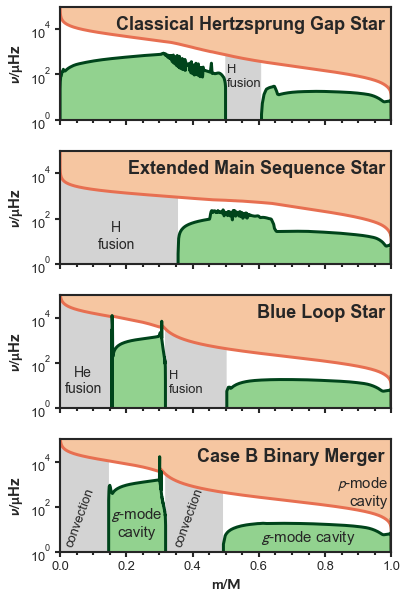

In [24]:
def plot_propagation(gyre, xlab=1, lab=0):
    x = gyre.r / np.max(gyre.r) 
    m = gyre.m / np.max(gyre.m)
    #print(gyre.Teff)
    #print(gyre.R/6.957e10)
    
    N  = gyre.N
    delta_Pi = 2*np.pi**2/np.sqrt(2)/ sp.integrate.trapz(N[N>0]/x[N>0], x[N>0]) / 60
    print(delta_Pi)
    delta_Pi = 2*np.pi**2/np.sqrt(2)/ sp.integrate.simps(N[N>0]/x[N>0], x[N>0]) / 60
    print(delta_Pi)
    print()
    
    N = gyre.N/(2*np.pi)*1e6
    N[N<0]=1e-10
    N[np.isnan(N)]=1e-10
    lamb = np.sqrt(1*(1+1))*gyre.cs / gyre.r * 1e6
    
    plt.gca().set_rasterization_zorder(-1)
    
    plt.plot(m, lamb, lw=3, label='Lamb', c=lamb_s)
    plt.plot(m, N, lw=3, label='Buoyancy', c=brunt_s)
    
    gmodes = np.minimum(N, lamb)
    pmodes = np.maximum(N, lamb)
    conv = [pmodes[ii] if N[ii]<=0 else 0 for ii in range(len(pmodes))]
    plt.fill_between(m, 
                     np.zeros(len(gmodes)), 
                     gmodes, 
                     color=brunt_f, zorder=-99)
    plt.fill_between(m, 
                     1e99*np.ones(len(pmodes)), 
                     pmodes, 
                     color=lamb_f, zorder=-99)
    plt.fill_between(m, 
                     np.zeros(len(gmodes)), 
                     conv, 
                     color='lightgray', zorder=-999)
    plt.ylim([1e0, 100000])
    plt.semilogy()
    plt.xlim([0, 1])
    plt.ylabel(r'$\mathbf{\nu/\mu}$Hz')
    if xlab:
        plt.xlabel(r'$\mathbf{m/M}$')
    else:
        plt.gca().set_xticklabels([])
    if lab:
        plt.legend(loc='lower left')

plt.figure(figsize=(6, 6.5*(4/3)))#figsize=(8*(2/3),6.5))
plt.subplot(412)
plot_propagation(grid_Hcore.iloc[0].Track.gyres[mdl_Hcore], xlab=0)
plt.text(0.98, 1e4, 'Extended Main Sequence Star', ha='right', weight='bold')
plt.text(0.17, 5, 'H\nfusion', fontsize=14, ha='center')
plt.subplot(411)
plot_propagation(grid_Hshell.iloc[0].Track.gyres[mdl_Hshel], xlab=0)
plt.text(0.98, 1e4, 'Classical Hertzsprung Gap Star', ha='right', weight='bold')
plt.text(0.505, 30, 'H\nfusion', fontsize=13, ha='left')
plt.subplot(413)
plot_propagation(grid_semi.iloc[0].Track.gyres[mdl_blue], xlab=0)
plt.text(0.98, 1e4, 'Blue Loop Star', ha='right', weight='bold')
plt.text(0.07, 5, 'He\nfusion', fontsize=14, ha='center')
plt.text(0.33, 5, 'H\nfusion', fontsize=13, ha='left')
plt.subplot(414)
plot_propagation(grid_merg.iloc[0].Track.gyres[mdl_merge], xlab=1)
plt.text(0.98, 1e4, 'Case B Binary Merger', ha='right', weight='bold')
plt.text(0.23, 5, '$g$-mode\ncavity', ha='center', fontsize=15)
plt.text(0.75, 3, '$g$-mode cavity', ha='center', fontsize=15)
plt.text(0.99, 120, '$p$-mode\ncavity', ha='right', fontsize=15)

plt.text(0.11, 2, 'convection', ha='right', fontsize=13, rotation=70)
plt.text(0.44, 2, 'convection', ha='right', fontsize=13, rotation=70)
#plt.text(0.07, 5, 'He\nfusion', fontsize=14, ha='center')
#plt.text(0.33, 5, 'H\nfusion', fontsize=13, ha='left')
plt.tight_layout()

plt.savefig('figs/propagation.pdf')

In [25]:
from scipy.integrate import cumulative_trapezoid

/tmp/ipykernel_1101/601960278.py:5: RuntimeWarning: divide by zero encountered in divide
  dP = 2*np.pi**2/np.sqrt(2)/cumulative_trapezoid(N[idx]/x[idx], x[idx], initial=0)/60


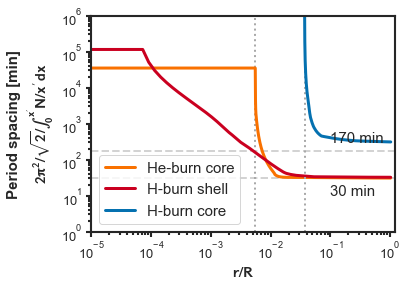

In [26]:
def plot_cumulative(gyre, label, color):
    x = gyre.r/gyre.R
    N = gyre.N
    idx = np.logical_and(x>0, N>0)
    dP = 2*np.pi**2/np.sqrt(2)/cumulative_trapezoid(N[idx]/x[idx], x[idx], initial=0)/60
    if x[idx][0] > 1e-4:
        plt.axvline(x[idx][0], ls=':', c='darkgray')
    plt.plot([1e-5] + list(x[idx][1:]), [dP[1]]+list(dP[1:]), label=label, lw=3, c=color)

plt.figure(figsize=(6, 6.5/1.5))

plot_cumulative(grid_merg.iloc[0].Track.gyres[mdl_merge], label='He-burn core', color=orange)
plot_cumulative(grid_Hshell.iloc[0].Track.gyres[mdl_Hshel], label='H-burn shell', color=red)
plot_cumulative(grid_Hcore.iloc[0].Track.gyres[mdl_Hcore], label='H-burn core', color=blue)

plt.axhline(30, ls='--', c='lightgray', zorder=-99)
plt.axhline(170, ls='--', c='lightgray', zorder=-99)
plt.text(0.1, 10, '30 min', size=15)
plt.text(0.1, 300, '170 min', size=15)

plt.xlim([1e-5, 1.2])
plt.ylim([1, 1000000])
plt.semilogx()
plt.semilogy()

#plt.ylabel(r'Period spacing $\mathbf{\Delta \Pi/}$min')
plt.ylabel(r'Period spacing [min]'+'\n'+r"$\mathbf{2\pi^2/\sqrt{2}/ \int_0^{x'} N/x' \, dx}$")
plt.xlabel(r'$\mathbf{r/R}$')
#plt.semilogy()
plt.tight_layout()
plt.legend(loc='lower left')


/tmp/ipykernel_1101/1209733412.py:7: RuntimeWarning: divide by zero encountered in divide
  dP = 2*np.pi**2/np.sqrt(2)/cumulative_trapezoid(N[idx]/x[idx], x[idx], initial=0)/60


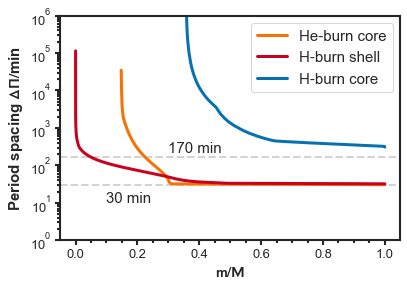

In [27]:
def plot_cumulative(gyre, label, color):
    r = gyre.r
    x = r/gyre.R
    N = gyre.N
    m = gyre.m/gyre.M
    idx = np.logical_and(x>0, N>0)
    dP = 2*np.pi**2/np.sqrt(2)/cumulative_trapezoid(N[idx]/x[idx], x[idx], initial=0)/60
    plt.plot(m[idx], dP, label=label, lw=3, c=color)

plt.figure(figsize=(6, 6.5/1.5))

plot_cumulative(grid_merg.iloc[0].Track.gyres[mdl_merge], label='He-burn core', color=orange)
plot_cumulative(grid_Hshell.iloc[0].Track.gyres[mdl_Hshel], label='H-burn shell', color=red)
plot_cumulative(grid_Hcore.iloc[0].Track.gyres[mdl_Hcore], label='H-burn core', color=blue)

plt.axhline(30, ls='--', c='lightgray', zorder=-99)
plt.axhline(170, ls='--', c='lightgray', zorder=-99)
plt.text(0.1, 10, '30 min', size=15)
plt.text(0.3, 220, '170 min', size=15)

plt.ylim([1, 1000000])
plt.semilogy()

plt.ylabel(r'Period spacing $\mathbf{\Delta \Pi/}$min')
plt.xlabel(r'$\mathbf{m/M}$')
plt.tight_layout()
plt.legend()


In [28]:
grid_merg.iloc[0].Track.dir

'work/grid_merge/M_17-mc_0.3-mg_0-Ye_0.28-Z_0.02/LOGS'

In [29]:
freqs = pd.read_table(os.path.join(grid_merg.iloc[0].Track.dir, 'profile121-freqs.dat'), sep='\s+', skiprows=5)
freqs

,E_norm,Re(freq),Im(freq),l,n_g,n_p,n_pg
0,4.647920e-06,6.180161,0.0,0,0,1,1
1,1.784254e-06,8.865917,0.0,0,0,2,2
2,3.103496e-07,10.675900,0.0,0,0,3,3
3,1.541995e-07,12.731053,0.0,0,0,4,4
4,1.080905e-07,15.013235,0.0,0,0,5,5
...,...,...,...,...,...,...,...
193,4.050797e-08,113.862837,0.0,1,4,43,40
194,3.916395e-08,116.440465,0.0,1,4,44,41
195,4.002379e-08,119.033718,0.0,1,4,45,42
196,4.286207e-08,121.633895,0.0,1,4,46,43


In [30]:
from astropy import units as unt

In [31]:
def days_to_uhz(days):
    """Convert period in days to frequency in microHertz."""
    seconds = days * 86400
    hz = 1 / seconds
    uhz = hz * 1e6
    return uhz

In [32]:
gyr = grid_merg.iloc[0].Track.gyres[121]

In [33]:
phot = np.argmin(((gyr.r / gyr.R) - 1)**2)
nu_ac = (gyr.cs)/(2*gyr.Hrho)
nu_ac = nu_ac[phot] * 1e6 # muHz
nu_ac

125.46950102145782

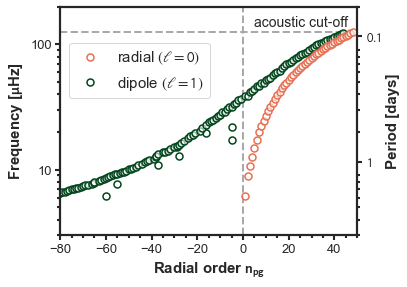

In [34]:
plt.figure(figsize=(6, 6.5/1.5))

radial = freqs[freqs['l'] == 0]
dipole = freqs[freqs['l'] == 1]
#mixed = dipole[np.logical_and(dipole['n_p'] > 0, dipole['n_g'] > 0)]

plt.plot(radial.n_pg, radial['Re(freq)'], 'o', ms=7, mfc='#ffffff99', mec=lamb_s, label=r'radial $(\ell=0)$', mew=1.5, zorder=3)
plt.plot(dipole.n_pg, dipole['Re(freq)'], 'o', ms=7, mfc='#ffffff99', mec=brunt_s, label=r'dipole $(\ell=1)$', mew=1.5)
#plt.plot(mixed.n_pg, mixed['Re(freq)'], 'k.', ms=5, label=r'mixed modes')
#plt.text(-6, 4, 'g modes', ha='right')
#plt.text(6, 4, 'p modes', ha='left')
plt.text(5, 140, 'acoustic cut-off', ha='left', size=14)

plt.legend(loc=(0.03, 0.6))
plt.axvline(0, ls='--', c='darkgray', zorder=-99)
plt.axhline(nu_ac, ls='--', c='darkgray', zorder=-99)
plt.semilogy()
plt.xlim([-80, 50])
plt.ylim([3, 2e2])
plt.gca().set_yticks([1e1, 1e2])
plt.gca().set_yticklabels([10, 100])

#plt.axhline(5, ls='--')

plt.xlabel(r'Radial order $\mathbf{n_{pg}}$')
plt.ylabel(r'Frequency [$\mathbf{\mu}$Hz]')

ax1 = plt.gca()
ax2 = plt.twinx()
ax2.set_yscale('log')
plt.ylim(ax1.get_ylim())
tick_values = [days_to_uhz(0.1), days_to_uhz(1)]#, days_to_uhz(10)]
ax2.set_yticks(tick_values)
ax2.set_yticklabels(['$0.1$', '$1$'])#, '$10$'])
ax2.set_ylabel('Period [days]')
plt.tight_layout()
plt.savefig('figs/frequency.pdf')

/tmp/ipykernel_1101/3400330326.py:6: RuntimeWarning: invalid value encountered in sqrt
  N  = np.sqrt(N2)


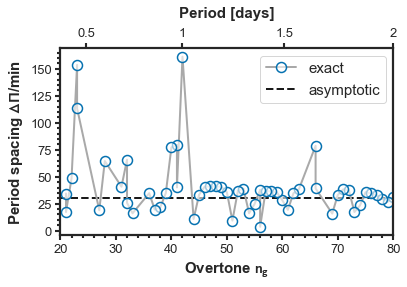

In [35]:
plt.figure(figsize=(6, 6.5/1.5))

s_per_day = 86400

N2 = gyr.N2
N  = np.sqrt(N2)
x  = gyr.x
Pi_0 = 2*np.pi**2/sp.integrate.trapezoid(N[N>0]/x[N>0], x[N>0]) / np.sqrt(2)

dipole_g = freqs.copy()[np.logical_and(freqs.l == 1, freqs.n_g > 0)]
dipole_g['P']  = 1/(dipole_g['Re(freq)'] * 10**-6) / s_per_day
for mode in dipole_g.iterrows():
    n_g  = mode[1]['n_g']
    n_g2 = dipole_g[dipole_g['n_g'] == n_g+1]
    if not n_g2.empty:
        n_g2 = n_g2[n_g2.E_norm == np.max(n_g2.E_norm)]
        dP = (n_g2['P'].values[0] - mode[1]['P']) * s_per_day # period spacing in seconds 
        dipole_g.loc[mode[0], 'dP'] = dP
dipole_g = dipole_g[dipole_g.dP > 0]
dipole_g = dipole_g[dipole_g.n_g > 20]

plt.plot(dipole_g['n_g'], dipole_g['dP'] / 60, 
             '.', c='darkgray', ms=20, zorder=10, ls='-', mec=blue, mfc='#ffffff99', mew=1.5, label='exact')
plt.axhline(Pi_0 / 60, ls='--', c='k', label=r'asymptotic', lw=2)
plt.legend()

plt.xlim([20, 80])
#plt.ylim([1, 1000])
#plt.semilogy()
plt.xlabel(r'Overtone $\mathbf{n_g}$')
plt.ylabel(r'Period spacing $\mathbf{\Delta\Pi}$/min')

ax = plt.gca()
top = ax.twiny()
top.set_xlabel(r'Period [days]', labelpad=10)
top.set_xlim(ax.get_xlim())

per_spac = dipole_g[~np.isnan(dipole_g.dP)][::-1]

n_g_ = per_spac.iloc[np.unique(per_spac.n_g, return_index=True)[1]]
n_g_inv = sp.interpolate.InterpolatedUnivariateSpline(n_g_.P, n_g_.n_g)

top.set_xticks([], minor=True)
top.set_xticks([n_g_inv(0.5), n_g_inv(1), n_g_inv(1.5), n_g_inv(2)])
top.set_xticklabels([0.5, 1, 1.5, 2]);

plt.tight_layout()
#plt.savefig('figs/period_spacing.pdf')

/tmp/ipykernel_1101/2627894400.py:6: RuntimeWarning: invalid value encountered in sqrt
  N  = np.sqrt(N2)


30.604928716974765


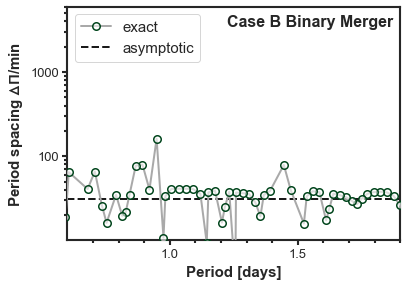

In [36]:
plt.figure(figsize=(6, 6.5/1.5))

s_per_day = 86400

N2 = gyr.N2
N  = np.sqrt(N2)
x  = gyr.x
Pi_0 = 2*np.pi**2/sp.integrate.trapezoid(N[N>0]/x[N>0], x[N>0]) / np.sqrt(2)

dipole_g = freqs.copy()[np.logical_and(freqs.l == 1, freqs.n_g > 0)]
dipole_g['P']  = 1/(dipole_g['Re(freq)'] * 10**-6) / s_per_day
for mode in dipole_g.iterrows():
    n_g  = mode[1]['n_g']
    n_g2 = dipole_g[dipole_g['n_g'] == n_g+1]
    if not n_g2.empty:
        n_g2 = n_g2[n_g2.E_norm == np.max(n_g2.E_norm)]
        dP = (n_g2['P'].values[0] - mode[1]['P']) * s_per_day # period spacing in seconds 
        dipole_g.loc[mode[0], 'dP'] = dP
dipole_g = dipole_g[dipole_g.dP > 0]
dipole_g = dipole_g[dipole_g.n_g > 20]

plt.plot(dipole_g['P'], dipole_g['dP'] / 60, 
             '.', c='darkgray', ms=15, zorder=10, ls='-', mec=brunt_s, mfc='#ffffff99', mew=1.5, label='exact')
plt.axhline(Pi_0 / 60, ls='--', c='k', label=r'asymptotic', lw=2)
print(Pi_0/60)
plt.legend(loc='upper left')

plt.xlim([0.6, 1.9])
plt.xlabel(r'Period [days]')
plt.ylabel(r'Period spacing $\mathbf{\Delta\Pi}$/min')
#plt.gca().set_xticks([0.5, 1, 1.5, 2])
plt.gca().set_xticks([1, 1.5])

plt.ylim([10, 6000])
plt.semilogy()
plt.gca().set_yticks([100, 1000])
plt.gca().set_yticklabels(['100', '1000'])

plt.text(0.98, 0.935, 'Case B Binary Merger', weight='bold', size=16, #backgroundcolor='white',
             ha='right', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.savefig('figs/period_spacing.pdf')


/tmp/ipykernel_1101/2450149126.py:50: RuntimeWarning: invalid value encountered in sqrt
  N  = np.sqrt(N2)


32.17459983704793


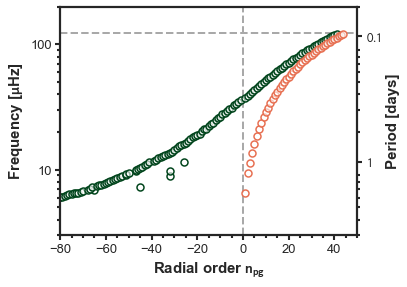

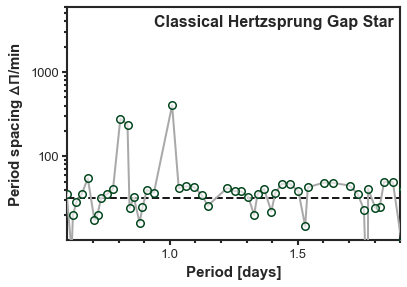

In [37]:
grid = grid_Hshell
mdl = mdl_Hshel

freqs = pd.read_table(os.path.join(grid.iloc[0].Track.dir, 'profile' + str(mdl) + '-freqs.dat'), sep='\s+', skiprows=5)

gyr = grid.iloc[0].Track.gyres[mdl]

phot = np.argmin(((gyr.r / gyr.R) - 1)**2)
nu_ac = (gyr.cs)/(2*gyr.Hrho)
nu_ac = nu_ac[phot] * 1e6 # muHz

freqs = freqs[freqs['Re(freq)'] < nu_ac]

plt.figure(figsize=(6, 6.5/1.5))

radial = freqs[freqs['l'] == 0]
dipole = freqs[freqs['l'] == 1]

plt.plot(radial.n_pg, radial['Re(freq)'], 'o', ms=7, mfc='#ffffff99', mec=lamb_s, label=r'radial $(\ell=0)$', mew=1.5, zorder=3)
plt.plot(dipole.n_pg, dipole['Re(freq)'], 'o', ms=7, mfc='#ffffff99', mec=brunt_s, label=r'dipole $(\ell=1)$', mew=1.5)

#plt.legend(loc=(0.03, 0.6))
plt.axvline(0, ls='--', c='darkgray', zorder=-99)
plt.axhline(nu_ac, ls='--', c='darkgray', zorder=-99)
plt.semilogy()
plt.xlim([-80, 50])
plt.ylim([3, 2e2])
plt.gca().set_yticks([1e1, 1e2])
plt.gca().set_yticklabels([10, 100])

plt.xlabel(r'Radial order $\mathbf{n_{pg}}$')
plt.ylabel(r'Frequency [$\mathbf{\mu}$Hz]')

ax1 = plt.gca()
ax2 = plt.twinx()
ax2.set_yscale('log')
plt.ylim(ax1.get_ylim())
tick_values = [days_to_uhz(0.1), days_to_uhz(1)]
ax2.set_yticks(tick_values)
ax2.set_yticklabels(['$0.1$', '$1$'])#, '$10$'])
ax2.set_ylabel('Period [days]')
plt.tight_layout()
plt.savefig('figs/frequency-hg.pdf')

plt.figure(figsize=(6, 6.5/1.5))

s_per_day = 86400

N2 = gyr.N2
N  = np.sqrt(N2)
x  = gyr.x
Pi_0 = 2*np.pi**2/sp.integrate.trapezoid(N[N>0]/x[N>0], x[N>0]) / np.sqrt(2)

dipole_g = freqs.copy()[np.logical_and(freqs.l == 1, freqs.n_g > 0)]
dipole_g['P']  = 1/(dipole_g['Re(freq)'] * 10**-6) / s_per_day
for mode in dipole_g.iterrows():
    n_g  = mode[1]['n_g']
    n_g2 = dipole_g[dipole_g['n_g'] == n_g+1]
    if not n_g2.empty:
        n_g2 = n_g2[n_g2.E_norm == np.max(n_g2.E_norm)]
        dP = (n_g2['P'].values[0] - mode[1]['P']) * s_per_day 
        dipole_g.loc[mode[0], 'dP'] = dP
dipole_g = dipole_g[dipole_g.dP > 0]
dipole_g = dipole_g[dipole_g.n_g > 20]

plt.plot(dipole_g['P'], dipole_g['dP'] / 60, 
             '.', c='darkgray', ms=15, zorder=10, ls='-', mec=brunt_s, mfc='#ffffff99', mew=1.5, label='exact')
plt.axhline(Pi_0 / 60, ls='--', c='k', label=r'asymptotic', lw=2)
print(Pi_0/60)
#plt.legend()

plt.xlim([0.6, 1.9])
plt.xlabel(r'Period [days]')
plt.ylabel(r'Period spacing $\mathbf{\Delta\Pi}$/min')
plt.gca().set_xticks([1, 1.5])

plt.ylim([10, 6000])
plt.semilogy()
plt.gca().set_yticks([100, 1000])
plt.gca().set_yticklabels(['100', '1000'])

plt.text(0.98, 0.935, 'Classical Hertzsprung Gap Star', weight='bold', size=16, #backgroundcolor='white',
             ha='right', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.savefig('figs/period_spacing-hg.pdf')


In [38]:
mdl_Hcore

103

/tmp/ipykernel_1101/1321608836.py:50: RuntimeWarning: invalid value encountered in sqrt
  N  = np.sqrt(N2)


308.2818696101546


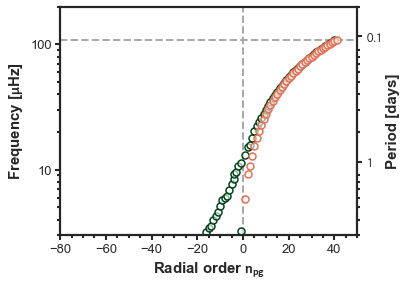

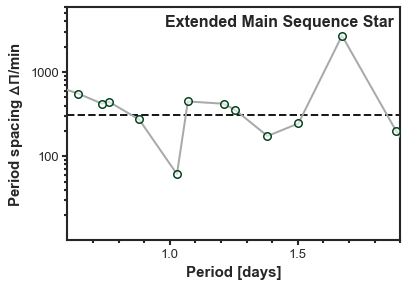

In [39]:
grid = grid_Hcore
mdl = mdl_Hcore

freqs = pd.read_table(os.path.join(grid.iloc[0].Track.dir, 'profile' + str(mdl) + '-freqs.dat'), sep='\s+', skiprows=5)

gyr = grid.iloc[0].Track.gyres[mdl]

phot = np.argmin(((gyr.r / gyr.R) - 1)**2)
nu_ac = (gyr.cs)/(2*gyr.Hrho)
nu_ac = nu_ac[phot] * 1e6 # muHz

freqs = freqs[freqs['Re(freq)'] < nu_ac]

plt.figure(figsize=(6, 6.5/1.5))

radial = freqs[freqs['l'] == 0]
dipole = freqs[freqs['l'] == 1]

plt.plot(radial.n_pg, radial['Re(freq)'], 'o', ms=7, mfc='#ffffff99', mec=lamb_s, label=r'radial $(\ell=0)$', mew=1.5, zorder=3)
plt.plot(dipole.n_pg, dipole['Re(freq)'], 'o', ms=7, mfc='#ffffff99', mec=brunt_s, label=r'dipole $(\ell=1)$', mew=1.5)

#plt.legend(loc=(0.03, 0.6))
plt.axvline(0, ls='--', c='darkgray', zorder=-99)
plt.axhline(nu_ac, ls='--', c='darkgray', zorder=-99)
plt.semilogy()
plt.xlim([-80, 50])
plt.ylim([3, 2e2])
plt.gca().set_yticks([1e1, 1e2])
plt.gca().set_yticklabels([10, 100])

plt.xlabel(r'Radial order $\mathbf{n_{pg}}$')
plt.ylabel(r'Frequency [$\mathbf{\mu}$Hz]')

ax1 = plt.gca()
ax2 = plt.twinx()
ax2.set_yscale('log')
plt.ylim(ax1.get_ylim())
tick_values = [days_to_uhz(0.1), days_to_uhz(1)]
ax2.set_yticks(tick_values)
ax2.set_yticklabels(['$0.1$', '$1$'])#, '$10$'])
ax2.set_ylabel('Period [days]')
plt.tight_layout()
plt.savefig('figs/frequency-extend.pdf')

plt.figure(figsize=(6, 6.5/1.5))

s_per_day = 86400

N2 = gyr.N2
N  = np.sqrt(N2)
x  = gyr.x
Pi_0 = 2*np.pi**2/sp.integrate.trapezoid(N[N>0]/x[N>0], x[N>0]) / np.sqrt(2)

dipole_g = freqs.copy()[np.logical_and(freqs.l == 1, freqs.n_g > 0)]
dipole_g['P']  = 1/(dipole_g['Re(freq)'] * 10**-6) / s_per_day
for mode in dipole_g.iterrows():
    n_g  = mode[1]['n_g']
    n_g2 = dipole_g[dipole_g['n_g'] == n_g+1]
    if not n_g2.empty:
        n_g2 = n_g2[n_g2.E_norm == np.max(n_g2.E_norm)]
        dP = (n_g2['P'].values[0] - mode[1]['P']) * s_per_day 
        dipole_g.loc[mode[0], 'dP'] = dP
dipole_g = dipole_g[dipole_g.dP > 0]
#dipole_g = dipole_g[dipole_g.n_g > 20]

plt.plot(dipole_g['P'], dipole_g['dP'] / 60, 
             '.', c='darkgray', ms=15, zorder=10, ls='-', mec=brunt_s, mfc='#ffffff99', mew=1.5, label='exact')
plt.axhline(Pi_0 / 60, ls='--', c='k', label=r'asymptotic', lw=2)
print(Pi_0/60)
#plt.legend()

plt.xlim([0.6, 1.9])
plt.xlabel(r'Period [days]')
plt.ylabel(r'Period spacing $\mathbf{\Delta\Pi}$/min')
plt.gca().set_xticks([1, 1.5])

plt.ylim([10, 6000])
plt.semilogy()
plt.gca().set_yticks([100, 1000])
plt.gca().set_yticklabels(['100', '1000'])

plt.text(0.98, 0.935, 'Extended Main Sequence Star', weight='bold', size=16, #backgroundcolor='white',
             ha='right', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.savefig('figs/period_spacing-extend.pdf')


In [40]:
len(grid_semi.iloc[0].Track.gyres)

497

/tmp/ipykernel_1101/895388637.py:50: RuntimeWarning: invalid value encountered in sqrt
  N  = np.sqrt(N2)


28.03364900250344


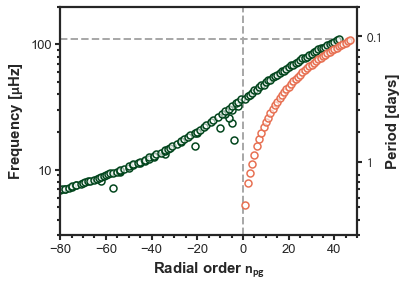

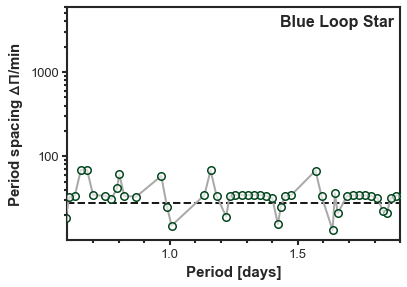

In [41]:
grid = grid_semi
mdl = mdl_blue

freqs = pd.read_table(os.path.join(grid.iloc[0].Track.dir, 'profile' + str(mdl) + '-freqs.dat'), sep='\s+', skiprows=5)

gyr = grid.iloc[0].Track.gyres[mdl]

phot = np.argmin(((gyr.r / gyr.R) - 1)**2)
nu_ac = (gyr.cs)/(2*gyr.Hrho)
nu_ac = nu_ac[phot] * 1e6 # muHz

freqs = freqs[freqs['Re(freq)'] < nu_ac]

plt.figure(figsize=(6, 6.5/1.5))

radial = freqs[freqs['l'] == 0]
dipole = freqs[freqs['l'] == 1]

plt.plot(radial.n_pg, radial['Re(freq)'], 'o', ms=7, mfc='#ffffff99', mec=lamb_s, label=r'radial $(\ell=0)$', mew=1.5, zorder=3)
plt.plot(dipole.n_pg, dipole['Re(freq)'], 'o', ms=7, mfc='#ffffff99', mec=brunt_s, label=r'dipole $(\ell=1)$', mew=1.5)

#plt.legend(loc=(0.03, 0.6))
plt.axvline(0, ls='--', c='darkgray', zorder=-99)
plt.axhline(nu_ac, ls='--', c='darkgray', zorder=-99)
plt.semilogy()
plt.xlim([-80, 50])
plt.ylim([3, 2e2])
plt.gca().set_yticks([1e1, 1e2])
plt.gca().set_yticklabels([10, 100])

plt.xlabel(r'Radial order $\mathbf{n_{pg}}$')
plt.ylabel(r'Frequency [$\mathbf{\mu}$Hz]')

ax1 = plt.gca()
ax2 = plt.twinx()
ax2.set_yscale('log')
plt.ylim(ax1.get_ylim())
tick_values = [days_to_uhz(0.1), days_to_uhz(1)]
ax2.set_yticks(tick_values)
ax2.set_yticklabels(['$0.1$', '$1$'])#, '$10$'])
ax2.set_ylabel('Period [days]')
plt.tight_layout()
plt.savefig('figs/frequency-loop.pdf')

plt.figure(figsize=(6, 6.5/1.5))

s_per_day = 86400

N2 = gyr.N2
N  = np.sqrt(N2)
x  = gyr.x
Pi_0 = 2*np.pi**2/sp.integrate.trapezoid(N[N>0]/x[N>0], x[N>0]) / np.sqrt(2)

dipole_g = freqs.copy()[np.logical_and(freqs.l == 1, freqs.n_g > 0)]
dipole_g['P']  = 1/(dipole_g['Re(freq)'] * 10**-6) / s_per_day
for mode in dipole_g.iterrows():
    n_g  = mode[1]['n_g']
    n_g2 = dipole_g[dipole_g['n_g'] == n_g+1]
    if not n_g2.empty:
        n_g2 = n_g2[n_g2.E_norm == np.max(n_g2.E_norm)]
        dP = (n_g2['P'].values[0] - mode[1]['P']) * s_per_day 
        dipole_g.loc[mode[0], 'dP'] = dP
dipole_g = dipole_g[dipole_g.dP > 0]
dipole_g = dipole_g[dipole_g.n_g > 20]

plt.plot(dipole_g['P'], dipole_g['dP'] / 60, 
             '.', c='darkgray', ms=15, zorder=10, ls='-', mec=brunt_s, mfc='#ffffff99', mew=1.5, label='exact')
plt.axhline(Pi_0 / 60, ls='--', c='k', label=r'asymptotic', lw=2)
print(Pi_0/60)
#plt.legend()

plt.xlim([0.6, 1.9])
plt.xlabel(r'Period [days]')
plt.ylabel(r'Period spacing $\mathbf{\Delta\Pi}$/min')
plt.gca().set_xticks([1, 1.5])

plt.ylim([10, 6000])
plt.semilogy()
plt.gca().set_yticks([100, 1000])
plt.gca().set_yticklabels(['100', '1000'])

plt.text(0.98, 0.935, 'Blue Loop Star', weight='bold', size=16, #backgroundcolor='white',
             ha='right', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.savefig('figs/period_spacing-loop.pdf')


/tmp/ipykernel_1101/2148965188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dipole['freq_cd'] = dipole['Re(freq)'] * 0.0864


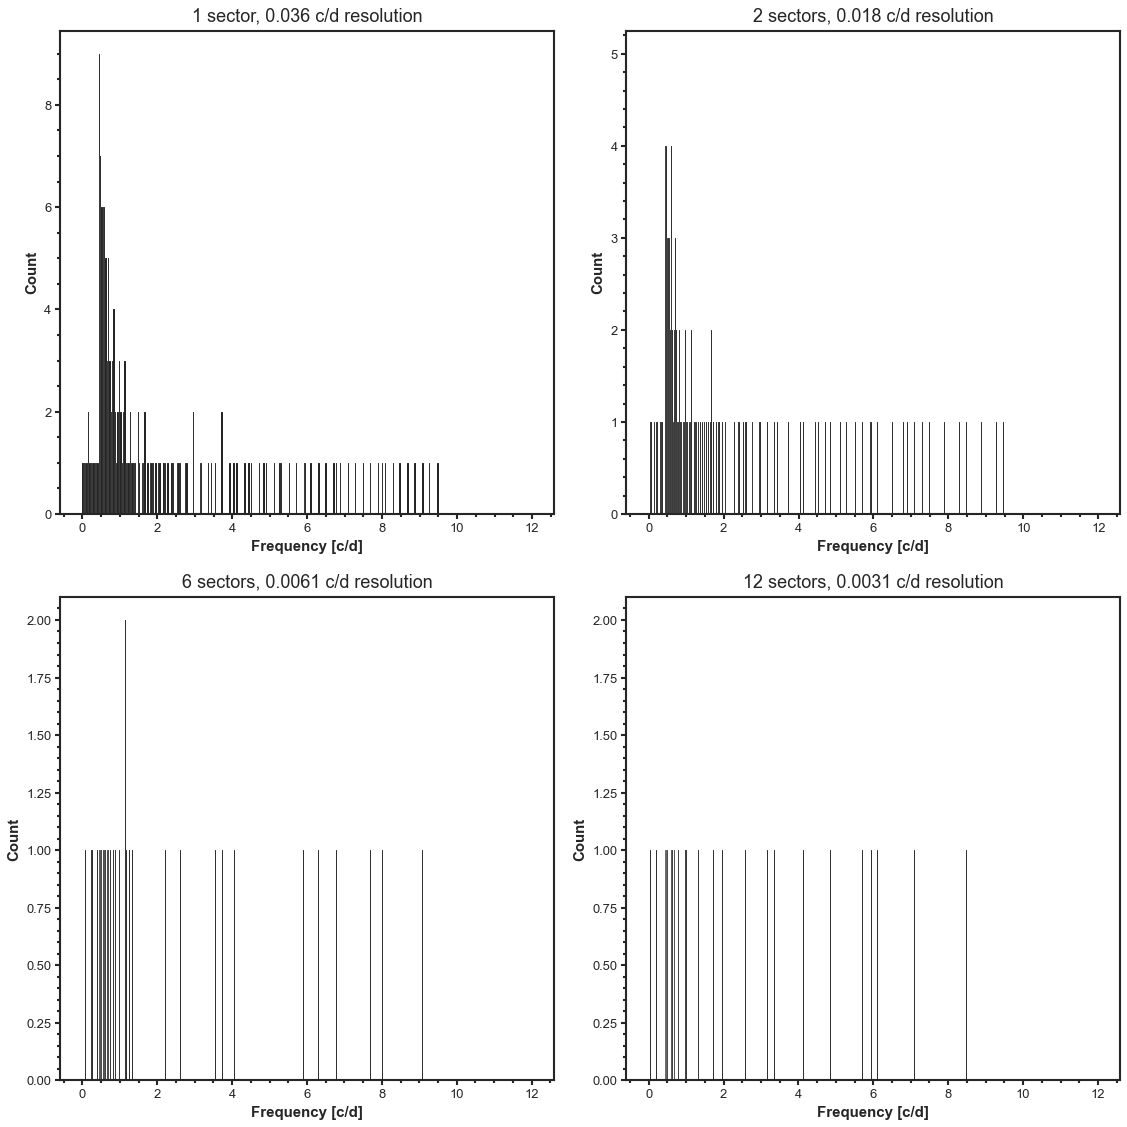

In [42]:
# Convert frequency from microHertz to cycles per day (c/d)
dipole['freq_cd'] = dipole['Re(freq)'] * 0.0864 

# Padding frequencies
freq_spacing = 0.03226 # Spacing in c/d
padded_freqs = list(dipole['freq_cd'])
while min(padded_freqs) > 0.0031:
    padded_freqs.append(min(padded_freqs) - freq_spacing)

# The plotting part
sectors = [1, 2, 6, 12]
resolution = [0.036, 0.018, 0.0061, 0.0031]
bins = [np.arange(0, 12, res) for res in resolution]
fig, axs = plt.subplots(2, 2, figsize=(16, 16))

for ax, sector, res, bins_ in zip(axs.flatten(), sectors, resolution, bins):
    ax.hist(padded_freqs, bins=bins_, color='k', alpha=1, lw=0.1)
    ax.set_title(f"{sector} sector{'s' if sector > 1 else ''}, {res} c/d resolution")
    ax.set_xlabel("Frequency [c/d]")
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()
